## This code performs an analysis of messi.csv using Deep Learning Neural Networks. 
### Data is from https://fbref.com/en/players/d70ce98e/matchlogs/2019-2020/summary/Lionel-Messi-Match-Logs. The data is collected for season 2019/2020 whichc includes his game attributes for both Argentina and Barcelona, however, I have considered only Barcelona data for this analysis. 
### Variables/attributes are: 
* date - date on which the game was played
* day - day of the week on which the game was played
* comp - competition in which the game was played, la liga, champions league, supercopa or copa del rey
* round - stage of competition at which the game was played
* venue - home, away or at a neutral venue
* result - result of the game
* squad - Barca or Argentina
* opponent - opposition team
* start - if Messi started the game or came on as a sub
* pos - position he played in FW: forward, AM: attacking mid, RW/LW: right/left wing 
* minutes - minutes played
* gls - goals scored by him
* ast - assists provided by him 
* pk - penalties won
* pkatt	- penalties attempted
* sh - shots taken not including penalties
* sot - shots on target not including penalties
* yellow - yellow cards shown by the ref to Messi
* red - red cards shown by the ref to Messi
* touches - Number of times he touched the ball, receiving a pass, dribbling and then making a pass counts as one touch 
* press - number of times applying pressure on the opposition player
* tkl - number of players tackled
* interceptions - interceptions made for the pass 
* blocks - blocking the ball by standing in its path
* xg - expected goals
* npxg - non penalty expected goals
* xa - expected assists
* sca - shot creation actions
* gca - goal creation actions
* passcomp - passess completed
* passattemp - passes attempted
* passcomppercent - pass completion percentage (target variable)
* progpass - progressive passes
* carries - number of time he controlled the ball
* progcarries - carries the ball towards the opponent's goal, atleast 5 yards
* successdrib - sucessful dribbles
* attemptdrib - attempted dribbles
* matchreport - NA for this study
* actresult	- actual result of the game (win, loss or draw)
* totgls - total goals scored by Messi's team
* totglconceded - total goals conceded by Messi's team 


#### Pass completion percentage is our target variable i:e we want to know if this variable is predicted correctly or not based off of other variables. 


###### Import libraries

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Import data 


In [251]:
df = pd.read_csv('messi.csv')

###### Preliminary data analysis and feature engineering 


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             44 non-null     object 
 1   day              44 non-null     object 
 2   comp             44 non-null     object 
 3   round            44 non-null     object 
 4   venue            44 non-null     object 
 5   result           44 non-null     object 
 6   squad            44 non-null     object 
 7   opponent         44 non-null     object 
 8   start            44 non-null     object 
 9   pos              44 non-null     object 
 10  minutes          44 non-null     int64  
 11  gls              44 non-null     int64  
 12  ast              44 non-null     int64  
 13  pk               44 non-null     int64  
 14  pkatt            44 non-null     int64  
 15  sh               44 non-null     int64  
 16  sot              44 non-null     int64  
 17  yellow           4

In [250]:
df.head()

,date,day,comp,round,venue,result,squad,opponent,start,pos,...,passcomppercent,progpass,carries,progcarries,successdrib,attemptdrib,matchreport,actresult,totgls,totglconceded
0,9/17/19,Tue,Champions Lg,Group stage,Away,D 0–0,es Barcelona,de Dortmund,N,"RW,LW",...,78.3,2.0,33.0,4.0,1.0,5.0,Match Report,D,0,0
1,9/21/19,Sat,La Liga,Matchweek 5,Away,L 0–2,Barcelona,Granada,N,AM,...,68.6,5.0,33.0,7.0,3.0,5.0,Match Report,L,0,2
2,9/24/19,Tue,La Liga,Matchweek 6,Home,W 2–1,Barcelona,Villarreal,Y*,RW,...,75.0,3.0,19.0,2.0,1.0,2.0,Match Report,W,2,1
3,10/2/19,Wed,Champions Lg,Group stage,Home,W 2–1,es Barcelona,it Inter,Y*,RW,...,83.8,14.0,83.0,16.0,11.0,13.0,Match Report,W,2,1
4,10/6/19,Sun,La Liga,Matchweek 8,Home,W 4–0,Barcelona,Sevilla,Y*,RW,...,81.2,5.0,74.0,17.0,7.0,9.0,Match Report,W,4,0


In [14]:
df['actresult'].value_counts()

W    27
D     9
L     8
Name: actresult, dtype: int64

In [4]:
df['start'].value_counts()

Y*    42
N      2
Name: start, dtype: int64

In [252]:
df = df.drop(["date","round","result","squad","opponent","pos","matchreport"],axis=1)
# dropping unnecessary/irrelevant variables

In [20]:
df['yellow']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    1
31    0
32    0
33    0
34    0
35    0
36    1
37    0
38    0
39    0
40    0
41    0
42    0
43    0
Name: yellow, dtype: int64

In [253]:
df = df.drop(['red'],axis=1) ### he has never got a red card for Barca prior to 2019/2020 season, 
#### his first red card was in January 2021 against Athletic Bilbao in the cup final

In [254]:
df.isna().sum() # check for missing data

day                0
comp               0
venue              0
start              0
minutes            0
gls                0
ast                0
pk                 0
pkatt              0
sh                 0
sot                0
yellow             0
touches            3
press              3
tkl                3
interceptions      0
blocks             3
xg                 3
npxg               3
xa                 3
sca                3
gca                3
passcomp           3
passattemp         3
passcomppercent    3
progpass           3
carries            3
progcarries        3
successdrib        3
attemptdrib        3
actresult          0
totgls             0
totglconceded      0
dtype: int64

In [255]:
df = df.fillna(df.mean()) # replace missing data with column mean

In [256]:
df.isna().sum()

day                0
comp               0
venue              0
start              0
minutes            0
gls                0
ast                0
pk                 0
pkatt              0
sh                 0
sot                0
yellow             0
touches            0
press              0
tkl                0
interceptions      0
blocks             0
xg                 0
npxg               0
xa                 0
sca                0
gca                0
passcomp           0
passattemp         0
passcomppercent    0
progpass           0
carries            0
progcarries        0
successdrib        0
attemptdrib        0
actresult          0
totgls             0
totglconceded      0
dtype: int64

<AxesSubplot:>

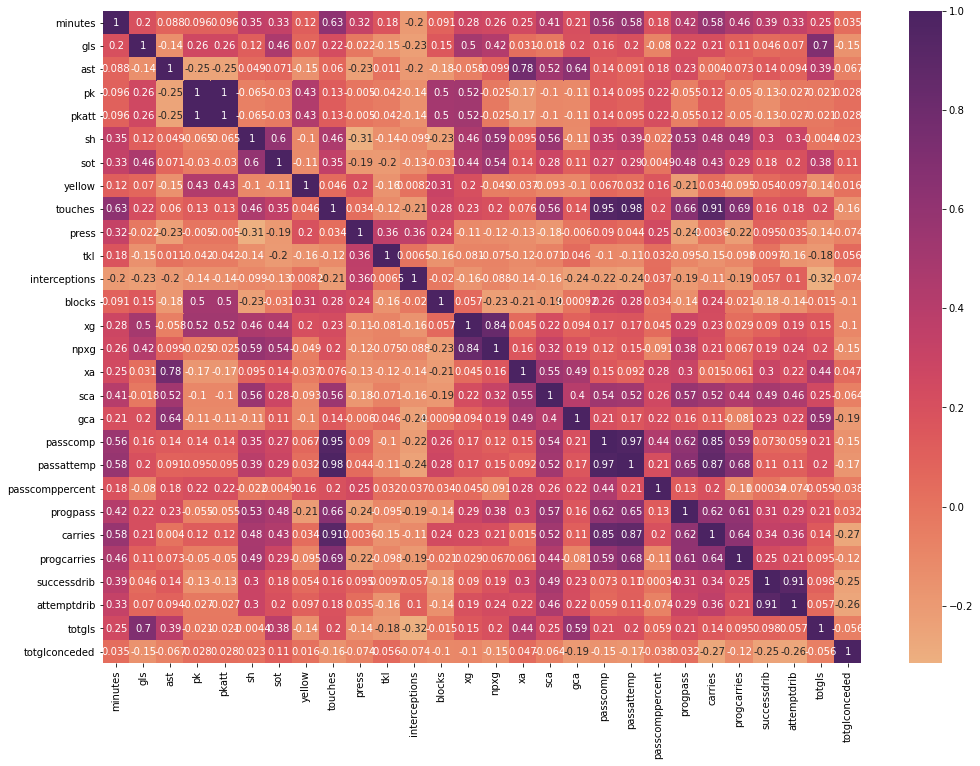

In [257]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),cmap="flare",annot=True) # check correlations

#### strong correlation between variables such as touches and passes completed, progressive 
#### carries which is expected


<AxesSubplot:xlabel='actresult', ylabel='count'>

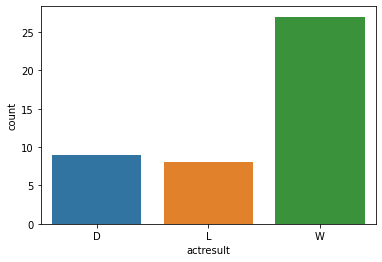

In [258]:
sns.countplot(x=df['actresult'])


<AxesSubplot:xlabel='day', ylabel='count'>

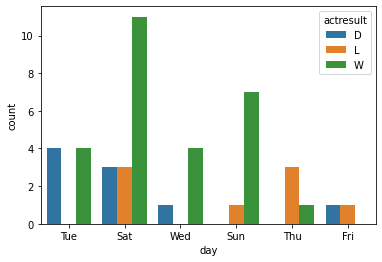

In [259]:
sns.countplot(x=df['day'],hue=df["actresult"])

Text(0.5, 1.0, 'Boxplot for result v passes attempted')

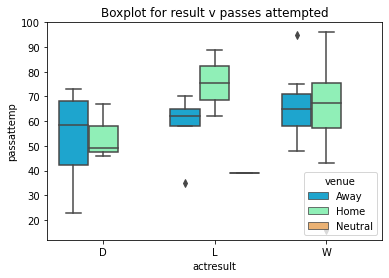

In [260]:
sns.boxplot(data=df,x="actresult", y="passattemp",hue='venue',
            palette='rainbow').set_title('Boxplot for result v passes attempted')


Text(0.5, 1.0, 'Boxplot for result v passes completed')

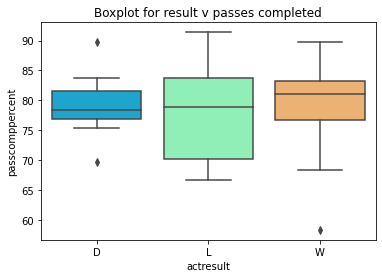

In [261]:
sns.boxplot(data=df,x="actresult", y="passcomppercent",
            palette='rainbow').set_title('Boxplot for result v passes completed')


#### Looks like Barcelona most likely win when Messi has a good game in terms of his passing...

Text(0.5, 1.0, 'Boxplot for result v successful dribbles')

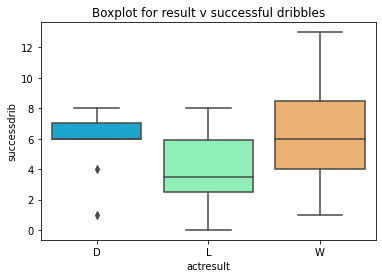

In [39]:
sns.boxplot(data=df,x="actresult", y="successdrib",
            palette='rainbow').set_title('Boxplot for result v successful dribbles')


Text(0.5, 1.0, 'Boxplot for result v attempted dribbles')

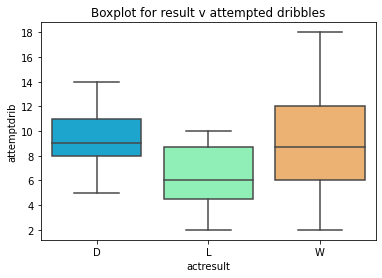

In [262]:
sns.boxplot(data=df,x="actresult", y="attemptdrib",
            palette='rainbow').set_title('Boxplot for result v attempted dribbles')


#### Median of the attempted dribbles is much lower when Barca lose than when they win/draw... 

Text(0.5, 1.0, 'Boxplot for result v attempted dribbles for diffnt competitions')

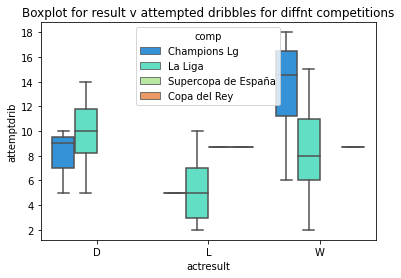

In [263]:
sns.boxplot(data=df,x="actresult", y="attemptdrib",hue="comp",
            palette='rainbow').set_title('Boxplot for result v attempted dribbles for diffnt competitions')


#### Median for attempted dribbles is highest for Champions league competition... 

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


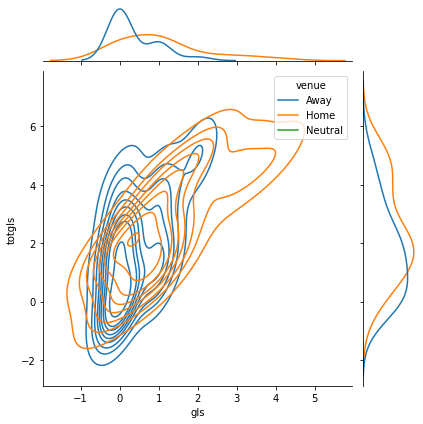

In [264]:
sns.jointplot(data=df, x="gls", y="totgls", hue="venue",kind="kde")

#### Proves that he is the main attacker, because of very positive correlation... and also his high scoring games
#### have been the away ones, comparatively... 

In [265]:
df['actresult'] = df['actresult'].replace(['W','D','L'],
                        [1,2,3]) # categorical variable

In [266]:
df.head()

,day,comp,venue,start,minutes,gls,ast,pk,pkatt,sh,...,passattemp,passcomppercent,progpass,carries,progcarries,successdrib,attemptdrib,actresult,totgls,totglconceded
0,Tue,Champions Lg,Away,N,32,0,0,0,0,1,...,23.0,78.3,2.0,33.0,4.0,1.0,5.0,2,0,0
1,Sat,La Liga,Away,N,45,0,0,0,0,2,...,35.0,68.6,5.0,33.0,7.0,3.0,5.0,3,0,2
2,Tue,La Liga,Home,Y*,45,0,1,0,0,1,...,16.0,75.0,3.0,19.0,2.0,1.0,2.0,1,2,1
3,Wed,Champions Lg,Home,Y*,90,0,1,0,0,4,...,68.0,83.8,14.0,83.0,16.0,11.0,13.0,1,2,1
4,Sun,La Liga,Home,Y*,90,1,0,0,0,6,...,69.0,81.2,5.0,74.0,17.0,7.0,9.0,1,4,0


In [267]:
df.corr()


,minutes,gls,ast,pk,pkatt,sh,sot,yellow,touches,press,...,passattemp,passcomppercent,progpass,carries,progcarries,successdrib,attemptdrib,actresult,totgls,totglconceded
minutes,1.000000,0.200365,0.087595,0.096063,0.096063,0.350089,0.332864,0.116694,0.629211,0.324275,...,0.580900,0.183050,0.417203,0.576047,0.459479,0.385204,0.327658,-0.148456,0.252019,0.034783
gls,0.200365,1.000000,-0.137393,0.263956,0.263956,0.116726,0.462176,0.070357,0.219876,-0.022359,...,0.200411,-0.080208,0.216401,0.213847,0.107008,0.046167,0.069652,-0.327655,0.704819,-0.154087
ast,0.087595,-0.137393,1.000000,-0.251481,-0.251481,0.049280,0.071073,-0.151873,0.060169,-0.233675,...,0.090887,0.180671,0.228832,0.004049,0.073496,0.144103,0.094155,-0.403368,0.386693,-0.066688
pk,0.096063,0.263956,-0.251481,1.000000,1.000000,-0.064505,-0.030194,0.431623,0.126883,-0.005030,...,0.095151,0.216606,-0.055422,0.120695,-0.050311,-0.131978,-0.026925,0.014599,-0.020621,0.028332
pkatt,0.096063,0.263956,-0.251481,1.000000,1.000000,-0.064505,-0.030194,0.431623,0.126883,-0.005030,...,0.095151,0.216606,-0.055422,0.120695,-0.050311,-0.131978,-0.026925,0.014599,-0.020621,0.028332
sh,0.350089,0.116726,0.049280,-0.064505,-0.064505,1.000000,0.599013,-0.104283,0.458862,-0.312752,...,0.390554,-0.021953,0.527988,0.482234,0.490843,0.297841,0.298230,0.051086,-0.004369,0.022508
sot,0.332864,0.462176,0.071073,-0.030194,-0.030194,0.599013,1.000000,-0.113530,0.350813,-0.190281,...,0.291281,0.004910,0.475097,0.432962,0.292000,0.179223,0.202716,-0.106423,0.382451,0.106574
yellow,0.116694,0.070357,-0.151873,0.431623,0.431623,-0.104283,-0.113530,1.000000,0.046449,0.196696,...,0.032307,0.159234,-0.212855,0.034052,-0.094776,0.053711,0.097478,0.161058,-0.143142,0.016389
touches,0.629211,0.219876,0.060169,0.126883,0.126883,0.458862,0.350813,0.046449,1.000000,0.033838,...,0.983524,0.195477,0.655863,0.912816,0.692337,0.160473,0.183891,-0.187876,0.195481,-0.155547
press,0.324275,-0.022359,-0.233675,-0.005030,-0.005030,-0.312752,-0.190281,0.196696,0.033838,1.000000,...,0.043749,0.245197,-0.239695,0.003602,-0.218592,0.095453,0.035394,0.026152,-0.141569,-0.073931


###### Creating dummy variables and dealing with the categorial variables 

In [268]:
dummies = pd.get_dummies(df[['day', 'comp','venue','start' ]],drop_first=True)
df = df.drop(['day', 'comp','venue','start'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [269]:
df.columns

Index(['minutes', 'gls', 'ast', 'pk', 'pkatt', 'sh', 'sot', 'yellow',
       'touches', 'press', 'tkl', 'interceptions', 'blocks', 'xg', 'npxg',
       'xa', 'sca', 'gca', 'passcomp', 'passattemp', 'passcomppercent',
       'progpass', 'carries', 'progcarries', 'successdrib', 'attemptdrib',
       'actresult', 'totgls', 'totglconceded', 'day_Sat', 'day_Sun', 'day_Thu',
       'day_Tue', 'day_Wed', 'comp_Copa del Rey', 'comp_La Liga',
       'comp_Supercopa de España', 'venue_Home', 'venue_Neutral', 'start_Y*'],
      dtype='object')

In [270]:
len(df)

44

In [271]:
# converting the actresult column to binary data columns
resultdummy = ['actresult']
df = pd.get_dummies(df,columns=resultdummy,drop_first=True)

In [272]:
df.head()

,minutes,gls,ast,pk,pkatt,sh,sot,yellow,touches,press,...,day_Tue,day_Wed,comp_Copa del Rey,comp_La Liga,comp_Supercopa de España,venue_Home,venue_Neutral,start_Y*,actresult_2,actresult_3
0,32,0,0,0,0,1,0,0,33.0,4.0,...,1,0,0,0,0,0,0,0,1,0
1,45,0,0,0,0,2,1,0,41.0,2.0,...,0,0,0,1,0,0,0,0,0,1
2,45,0,1,0,0,1,0,0,22.0,4.0,...,1,0,0,1,0,1,0,1,0,0
3,90,0,1,0,0,4,3,0,83.0,9.0,...,0,1,0,0,0,1,0,1,0,0
4,90,1,0,0,0,6,3,0,83.0,6.0,...,0,0,0,1,0,1,0,1,0,0


In [273]:
df.columns

Index(['minutes', 'gls', 'ast', 'pk', 'pkatt', 'sh', 'sot', 'yellow',
       'touches', 'press', 'tkl', 'interceptions', 'blocks', 'xg', 'npxg',
       'xa', 'sca', 'gca', 'passcomp', 'passattemp', 'passcomppercent',
       'progpass', 'carries', 'progcarries', 'successdrib', 'attemptdrib',
       'totgls', 'totglconceded', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue',
       'day_Wed', 'comp_Copa del Rey', 'comp_La Liga',
       'comp_Supercopa de España', 'venue_Home', 'venue_Neutral', 'start_Y*',
       'actresult_2', 'actresult_3'],
      dtype='object')

###### Train Test Split

In [274]:
from sklearn.model_selection import train_test_split


In [275]:
X = df.drop(['passcomppercent'],axis=1).values
y = df['passcomppercent'].values

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [277]:
df.shape

(44, 41)

###### Scaling the data

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Building the model

In [279]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.0000001) # I played with this learning rate a lot before I reached my final model

In [280]:
model = Sequential()
# I played with the number of layers/neurons/activation function a lot before reaching this final model
# input layer
model.add(Dense(39,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1))
model.compile(optimizer='adam',
              loss='mse') # I tried other optimizers like SGD, rmsprop as well , but adam is the best one for this problem...

In [281]:
# I tried only 200 epochs because my computer is not able to handle large computations...
model.fit(x=X_train, 
          y=y_train,
          epochs=200,
          batch_size=5,
          validation_data=(X_test, y_test), 
          )

Train on 30 samples, validate on 14 samples
Epoch 1/200
30/30 [==============================] - 1s 37ms/sample - loss: 6195.7983 - val_loss: 6449.7553
Epoch 2/200
30/30 [==============================] - 0s 3ms/sample - loss: 6185.0463 - val_loss: 6438.2855
Epoch 3/200
30/30 [==============================] - 0s 3ms/sample - loss: 6173.4717 - val_loss: 6428.9404
Epoch 4/200
30/30 [==============================] - 0s 2ms/sample - loss: 6162.5399 - val_loss: 6420.2889
Epoch 5/200
30/30 [==============================] - 0s 3ms/sample - loss: 6156.7598 - val_loss: 6410.6453
Epoch 6/200
30/30 [==============================] - 0s 3ms/sample - loss: 6145.0239 - val_loss: 6401.6331
Epoch 7/200
30/30 [==============================] - 0s 3ms/sample - loss: 6125.6917 - val_loss: 6391.9969
Epoch 8/200
30/30 [==============================] - 0s 2ms/sample - loss: 6123.9577 - val_loss: 6381.4438
Epoch 9/200
30/30 [==============================] - 0s 3ms/sample - loss: 6110.3725 - val_loss: 63

Epoch 77/200
30/30 [==============================] - 0s 3ms/sample - loss: 2620.0452 - val_loss: 554.7676
Epoch 78/200
30/30 [==============================] - 0s 3ms/sample - loss: 1334.8484 - val_loss: 505.8320
Epoch 79/200
30/30 [==============================] - 0s 3ms/sample - loss: 1513.8563 - val_loss: 495.7726
Epoch 80/200
30/30 [==============================] - 0s 3ms/sample - loss: 1756.2363 - val_loss: 514.2049
Epoch 81/200
30/30 [==============================] - 0s 2ms/sample - loss: 1657.8011 - val_loss: 516.8931
Epoch 82/200
30/30 [==============================] - 0s 3ms/sample - loss: 1336.9879 - val_loss: 532.5576
Epoch 83/200
30/30 [==============================] - 0s 2ms/sample - loss: 1423.6122 - val_loss: 580.6112
Epoch 84/200
30/30 [==============================] - 0s 3ms/sample - loss: 1615.3656 - val_loss: 608.8080
Epoch 85/200
30/30 [==============================] - 0s 3ms/sample - loss: 2201.3100 - val_loss: 597.8809
Epoch 86/200
30/30 [=================

30/30 [==============================] - 0s 3ms/sample - loss: 1623.5508 - val_loss: 347.4278
Epoch 154/200
30/30 [==============================] - 0s 3ms/sample - loss: 843.3944 - val_loss: 345.2479
Epoch 155/200
30/30 [==============================] - 0s 3ms/sample - loss: 1563.2914 - val_loss: 348.4671
Epoch 156/200
30/30 [==============================] - 0s 3ms/sample - loss: 1315.2287 - val_loss: 402.7488
Epoch 157/200
30/30 [==============================] - 0s 3ms/sample - loss: 1215.9044 - val_loss: 484.0138
Epoch 158/200
30/30 [==============================] - 0s 3ms/sample - loss: 1103.5190 - val_loss: 526.6163
Epoch 159/200
30/30 [==============================] - 0s 2ms/sample - loss: 1445.1521 - val_loss: 522.8963
Epoch 160/200
30/30 [==============================] - 0s 2ms/sample - loss: 1488.0250 - val_loss: 506.2324
Epoch 161/200
30/30 [==============================] - 0s 2ms/sample - loss: 895.5980 - val_loss: 472.2689
Epoch 162/200
30/30 [=======================

In [282]:
from tensorflow.keras.models import load_model
model.save('messi_project_model.h5')  

###### Check model performance


In [283]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

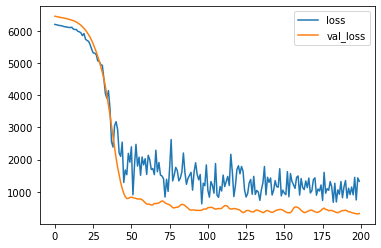

In [284]:
losses[['loss','val_loss']].plot()

#### There might be a bit of underfitting... 

In [285]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [286]:
predictions = model.predict(X_test)

In [287]:
predictions

array([[55.79867 ],
       [81.81673 ],
       [62.806244],
       [59.55696 ],
       [62.161144],
       [68.01558 ],
       [73.00562 ],
       [57.350605],
       [57.793568],
       [82.42502 ],
       [67.29783 ],
       [69.20589 ],
       [69.28878 ],
       [83.7975  ]], dtype=float32)

In [288]:
y_test

array([83.        , 70.8       , 89.7       , 68.7       , 81.2       ,
       91.4       , 79.7       , 79.2       , 89.7       , 75.4       ,
       69.6       , 84.4       , 78.84878049, 77.6       ])

In [289]:
mean_absolute_error(y_test,predictions)

15.529081048201187

In [290]:
np.sqrt(mean_squared_error(y_test,predictions))

17.994055980282223

In [294]:
explained_variance_score(y_test,predictions)

-2.5772596527374363

In [295]:
mean_squared_error(y_test,predictions)

323.7860506215305

In [293]:
df['passcomppercent'].mean()

78.84878048780489

#### Considering the mean of the actual target variable, variance score looks reasonable... 

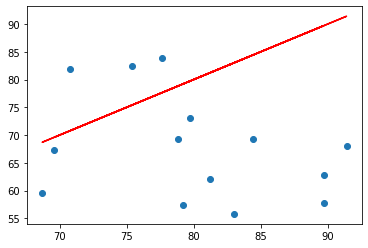

In [296]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [297]:
errors = y_test - predictions

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

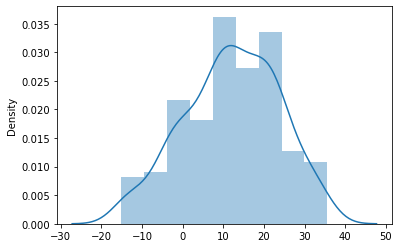

In [298]:
sns.distplot(errors)

#### not really centered at 0 but it looks all right... 